# **Predicción del valor de los jugadores de la RFEF**

**Integrantes:**


David Anaya --- 2211714


Yiber Romero --- 2221835


Cesar Vanegas --- 2220040


**Grupo** :

Inteligencia Artificial I ---- 2025-1 ----  F1

<img src="https://www.atm-es.com/wp-content/uploads/2023/08/ATM-Broadcast-RFEF.jpg" />

## **Explicación del dataset**

 <p align="justify">
El dataset que se va a utilizar es con respecto a un estudio de la Real Federación Española de Fútbol (RFEF) en la temporada de 2023-2024 gracias al esfuerzo de Isabelo Castillo. Dicho conjunto de datos recopila información sobre el desempeño de los jugadores de las categorias regionales de España, abarcando aspectos como los partidos, titularidades, goles, tarjetas que ha recibido, posición en el campo de juego, entre otros.


 <p align="justify">
La razón por la que se ha seleccionado esta información es con el fin de desarrollar un modelo de predicción del valor de un jugador , teniendo en cuenta su desempeño. Se busca poder identificar variables relevantes  que determinen su valor y construir un sistema capaz de estimar de manera precisa utilizando la inteligencia artificial y machine learning. Esto no solo facilitaría el análisis del rendimiento de los jugadores, sino que podría convertirse en una herramienta útil para el fichaje y negociaciones dentro del ámbito futbolístico.

## **Análisis del dataset**

In [ ]:
#Para que funcione de una manera parecida a la vista en los notebooks vistos en clase se optó por subirlo a drive y desde allí leerlo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

futbol = pd.read_csv('/content/jugadores_RFEF_2024.csv', sep=",", encoding="utf-8-sig")
print("columns and shape", futbol.columns, futbol.shape)
print("---------------- \n Display data \n---------------")
futbol.head(25)

columns and shape Index(['id', 'nombre', 'partidos_jugados', 'partidos_titular', 'goles',
       'asistencias', 'tarjeta_amarilla', 'edad', 'altura', 'valor', 'rating',
       'posicion'],
      dtype='object') (10107, 12)
---------------- 
 Display data 
---------------


,id,nombre,partidos_jugados,partidos_titular,goles,asistencias,tarjeta_amarilla,edad,altura,valor,rating,posicion
0,0,Alberto Varo,34,34,21,1,2,31,191.000000,174640.0,59,Portero
1,2,Dani Parra,5,4,3,0,1,24,188.000000,91220.0,44,Portero
2,4,Joan Oriol,37,36,1,3,9,37,175.000000,119000.0,62,Lateral Izquierdo
3,5,P. Trigueros,37,37,5,1,6,31,188.000000,217500.0,57,Defensa Central
4,6,Nacho González,31,31,2,0,8,29,185.000000,340340.0,61,Defensa Central
5,7,Pol Domingo,29,28,0,0,5,24,180.000000,392580.0,57,Lateral Derecho
6,8,Unai Dufur,18,7,0,0,0,25,187.000000,310340.0,54,Defensa Central
7,9,Alex Tirlea,19,10,0,0,2,24,182.000000,161330.0,49,Lateral Derecho
8,11,Iker Recio,12,3,0,1,1,23,184.000000,134810.0,51,Defensa Central
9,12,B. Martínez,36,34,1,6,5,29,178.000000,293610.0,56,Mediocentro


In [ ]:
#@title **code** `DataFrame.describe`
futbol.describe()

,id,partidos_jugados,partidos_titular,goles,asistencias,tarjeta_amarilla,edad,altura,valor,rating
count,10107.000000,10107.000000,10107.000000,10107.000000,10107.000000,10107.000000,10107.000000,10107.000000,1.010700e+04,10107.000000
mean,6287.781636,21.876719,16.050856,3.424656,0.282280,3.800336,21.846542,180.747456,4.810547e+04,41.164440
std,3599.007966,9.285254,9.813247,6.915562,0.923968,3.148811,9.691445,4.383831,1.252481e+05,7.382369
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.000000,2.196100e+02,25.000000
25%,3162.500000,15.000000,8.000000,0.000000,0.000000,1.000000,20.000000,180.095030,2.260000e+03,37.000000
50%,6333.000000,24.000000,16.000000,1.000000,0.000000,3.000000,23.000000,180.739135,8.370000e+03,41.000000
75%,9379.500000,30.000000,24.000000,3.000000,0.000000,6.000000,27.000000,181.820268,3.127500e+04,46.000000
max,12534.000000,38.000000,38.000000,97.000000,17.000000,19.000000,47.000000,201.000000,3.370000e+06,70.000000


 <p align="justify">
 Se tuvo en cuenta un aspecto que puede complicar el grafico de goles para la posición de arquero por lo que para ser graficado fue excluido de la gráfica. Además de que hay jugadores en el apartado de edad que aparecen con 0, por lo que es necesario no tenerlos en cuenta.

In [ ]:
#@title **code** `Excluimos a los arqueros`
futbol_no_porteros = futbol[futbol['posicion'].str.lower() != 'portero']
futbol_edad_filtrado = futbol[futbol['edad'] > 0]
goles_en_contra_porteros = futbol[futbol['posicion'].str.lower() == 'portero']

In [ ]:
#@title **code** `Configuración general de los gráficos`
plt.style.use('ggplot')
sns.set_palette('pastel')

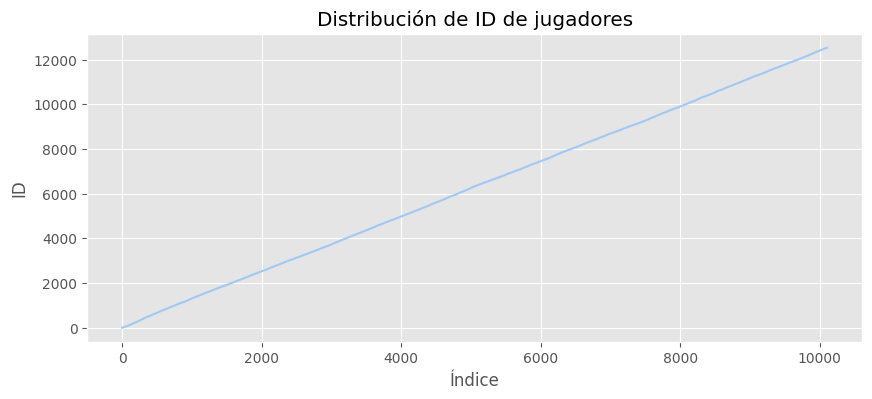

In [ ]:
#@title **code** `ID`
plt.figure(figsize=(10, 4))
plt.plot(futbol['id'])
plt.title('Distribución de ID de jugadores')
plt.xlabel('Índice')
plt.ylabel('ID')
plt.show()

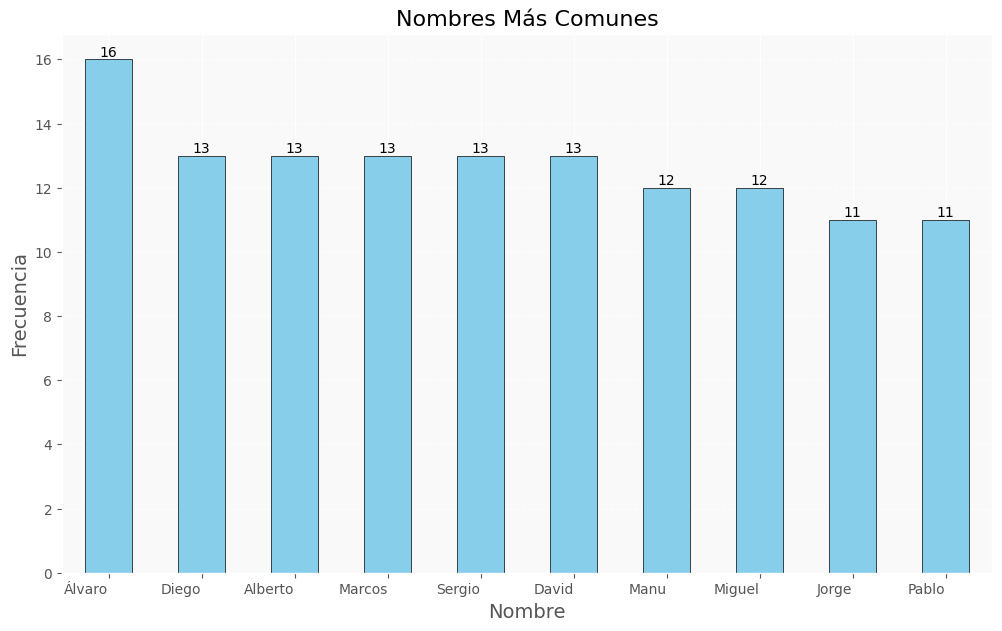

In [ ]:
#@title **code** 2. Nombre`
#la frecuencia de los nombres más comunes
plt.figure(figsize=(12, 7))
# Creamos el gráfico de barras
bars = futbol['nombre'].value_counts().head(10).plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

# Título y etiquetas personalizadas
plt.title('Nombres Más Comunes', fontsize=16)
plt.xlabel('Nombre', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el valor exacto encima de cada barra
for i, value in enumerate(futbol['nombre'].value_counts().head(10).values):
    plt.text(
        i,
        value,
        str(value),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Giramos las etiquetas del eje X para mejor lectura
plt.xticks(rotation=0, ha='right')

# Mejoramos el fondo y agregamos cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')

plt.show()


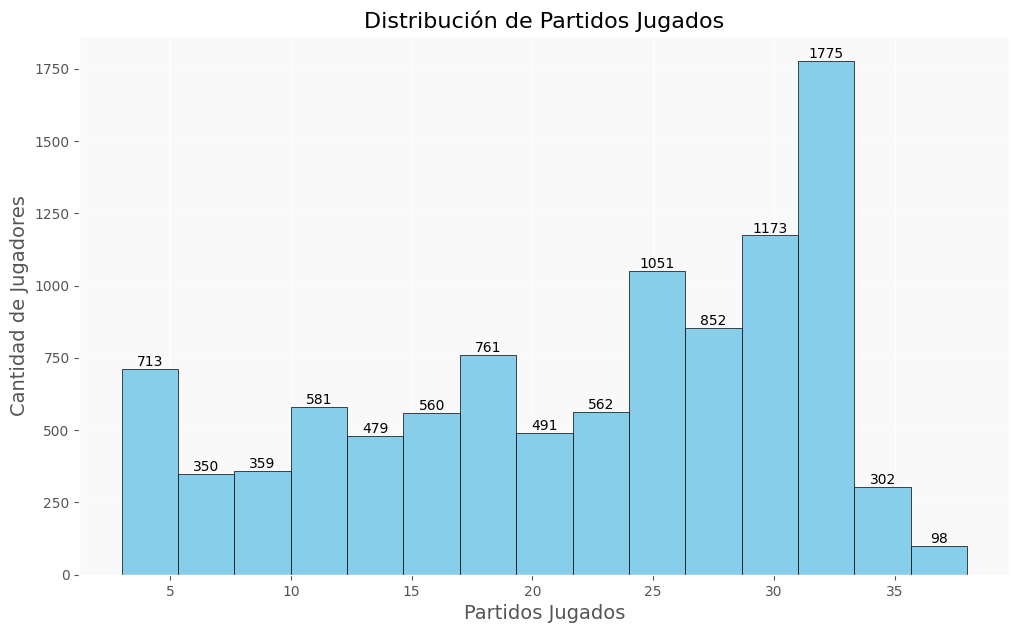

In [ ]:
#@title **code** `3. Partidos_Jugados`
plt.figure(figsize=(12, 7))

# Histograma con bordes para las barras
counts, bins, patches = plt.hist(
    futbol['partidos_jugados'].dropna(),  # Aseguramos no tener NaN
    bins=15,
    color='skyblue',
    edgecolor='black'
)

# Título y etiquetas personalizadas
plt.title('Distribución de Partidos Jugados', fontsize=16)
plt.xlabel('Partidos Jugados', fontsize=14)
plt.ylabel('Cantidad de Jugadores', fontsize=14)

# Mostrar el valor exacto encima de cada barra
for count, x in zip(counts, bins[:-1]):
    plt.text(
        x + (bins[1] - bins[0]) / 2,
        count,
        int(count),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Mejorar el fondo y la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')

plt.show()


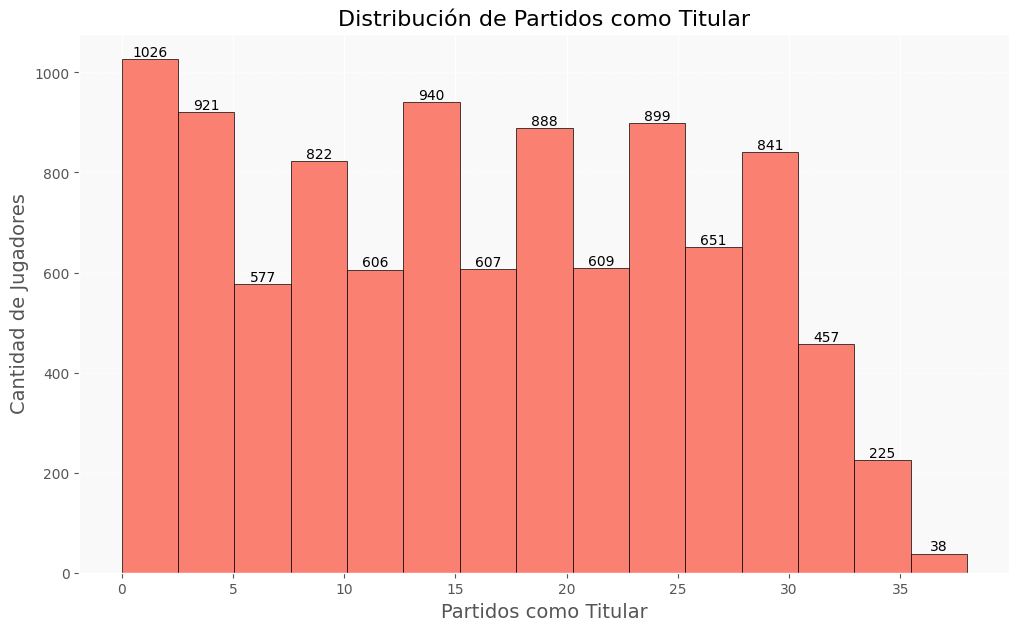

In [ ]:
#@title **code** `4. Partidos_Titular`
plt.figure(figsize=(12, 7))

# Histograma con bordes para más claridad
counts, bins, patches = plt.hist(futbol['partidos_titular'].dropna(),
                                 bins=15,
                                 color='salmon',
                                 edgecolor='black')

# Títulos y etiquetas
plt.title('Distribución de Partidos como Titular', fontsize=16)
plt.xlabel('Partidos como Titular', fontsize=14)
plt.ylabel('Cantidad de Jugadores', fontsize=14)

# Etiquetas encima de cada barra
for count, x in zip(counts, bins[:-1]):
    plt.text(x + (bins[1] - bins[0])/2, count, int(count),
             ha='center', va='bottom', fontsize=10, color='black')

# Estilo de fondo y cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')

plt.show()


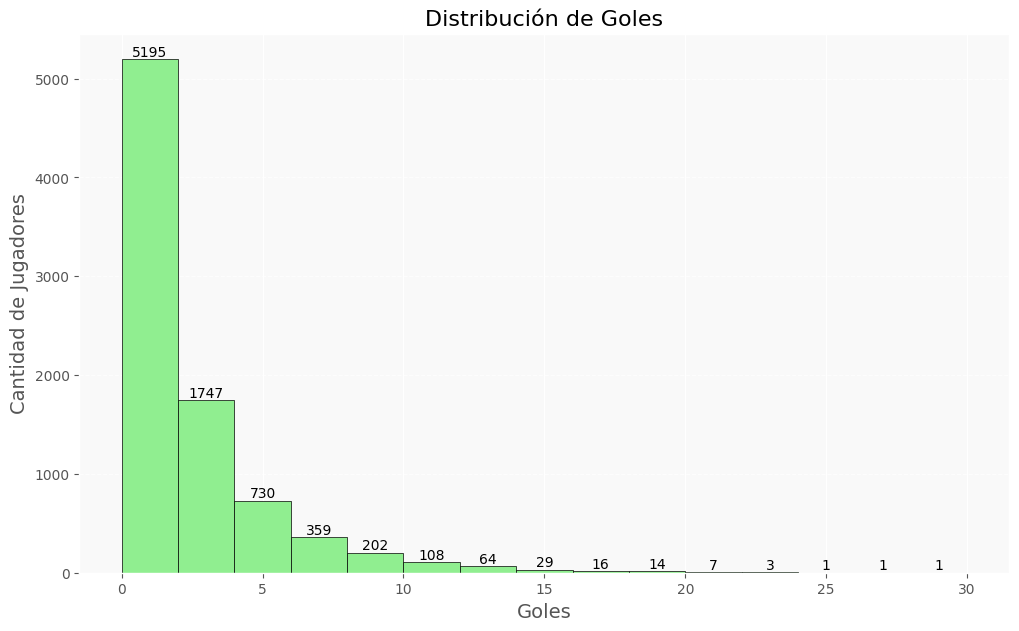

In [ ]:
#@title **code** `5. Goles`
plt.figure(figsize=(12, 7))

# Histograma con bordes para mejor visibilidad
counts, bins, patches = plt.hist(futbol_no_porteros['goles'].dropna(),
                                 bins=15,
                                 color='lightgreen',
                                 edgecolor='black')

# Títulos y etiquetas claras
plt.title('Distribución de Goles', fontsize=16)
plt.xlabel('Goles', fontsize=14)
plt.ylabel('Cantidad de Jugadores', fontsize=14)

# Conteo encima de cada barra
for count, x in zip(counts, bins[:-1]):
    plt.text(x + (bins[1] - bins[0])/2, count, int(count),
             ha='center', va='bottom', fontsize=10, color='black')

# Estilo del fondo y cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')

plt.show()


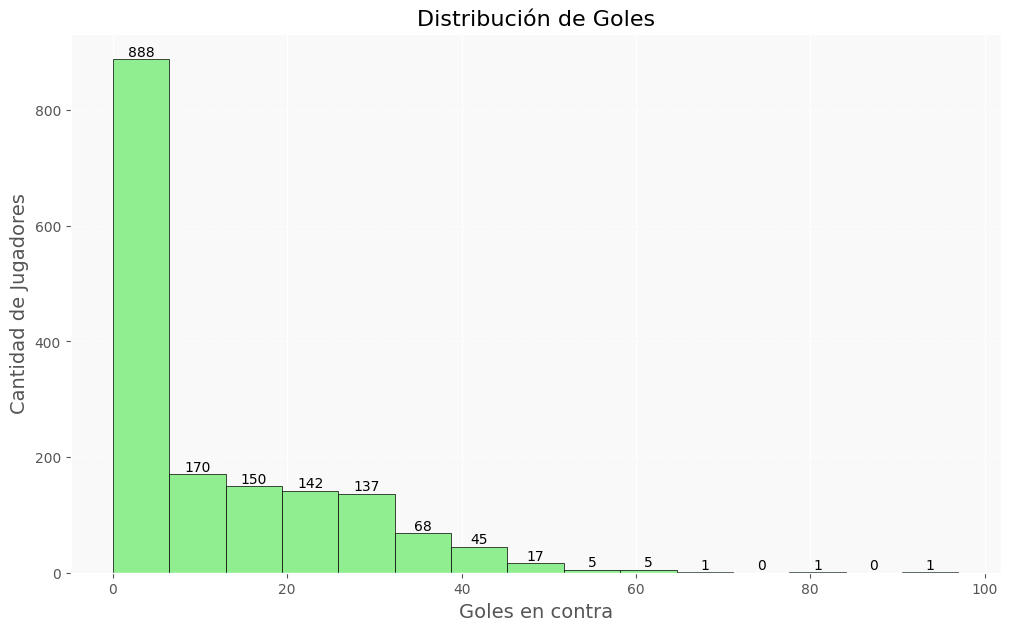

In [ ]:
#@title **code** `5. Goles en contra Porteros`
plt.figure(figsize=(12, 7))

# Histograma con bordes para mejor visibilidad
counts, bins, patches = plt.hist(goles_en_contra_porteros['goles'].dropna(),
                                 bins=15,
                                 color='lightgreen',
                                 edgecolor='black')

# Títulos y etiquetas claras
plt.title('Distribución de Goles', fontsize=16)
plt.xlabel('Goles en contra', fontsize=14)
plt.ylabel('Cantidad de Jugadores', fontsize=14)

# Conteo encima de cada barra
for count, x in zip(counts, bins[:-1]):
    plt.text(x + (bins[1] - bins[0])/2, count, int(count),
             ha='center', va='bottom', fontsize=10, color='black')

# Estilo del fondo y cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')

plt.show()

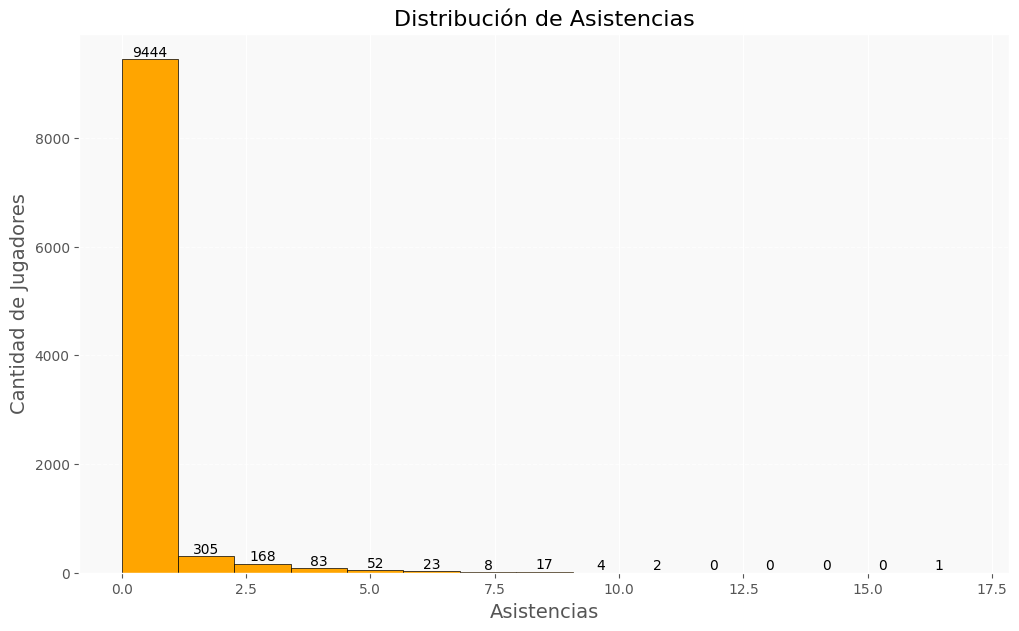

In [ ]:
#@title **code** `6. Asistencias`
plt.figure(figsize=(12, 7))

# Histograma con bordes para mejor visibilidad
counts, bins, patches = plt.hist(futbol['asistencias'].dropna(),
                                 bins=15,
                                 color='orange',
                                 edgecolor='black')

# Títulos y etiquetas claras
plt.title('Distribución de Asistencias', fontsize=16)
plt.xlabel('Asistencias', fontsize=14)
plt.ylabel('Cantidad de Jugadores', fontsize=14)

# Conteo encima de cada barra
for count, x in zip(counts, bins[:-1]):
    plt.text(x + (bins[1] - bins[0])/2, count, int(count),
             ha='center', va='bottom', fontsize=10, color='black')

# Estilo del fondo y cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')

plt.show()


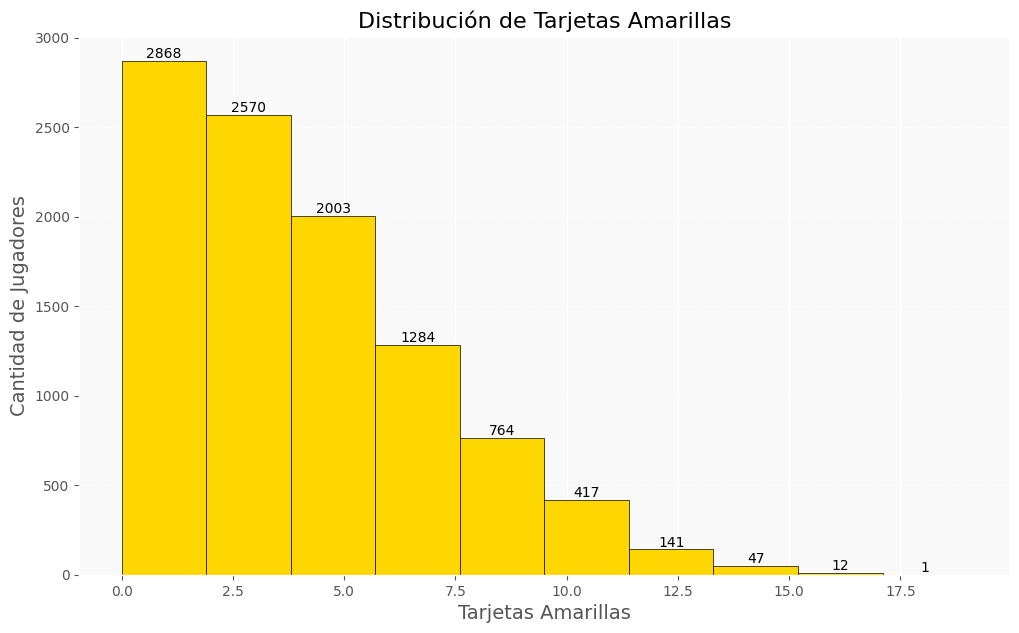

In [ ]:
#@title **code** `7. Tarjeta_Amarilla`
plt.figure(figsize=(12, 7))

# Histograma con bordes para mejor visibilidad
counts, bins, patches = plt.hist(futbol['tarjeta_amarilla'].dropna(),
                                 bins=10,
                                 color='gold',
                                 edgecolor='black')

# Títulos y etiquetas claras
plt.title('Distribución de Tarjetas Amarillas', fontsize=16)
plt.xlabel('Tarjetas Amarillas', fontsize=14)
plt.ylabel('Cantidad de Jugadores', fontsize=14)

# Conteo encima de cada barra
for count, x in zip(counts, bins[:-1]):
    plt.text(x + (bins[1] - bins[0])/2, count, int(count),
             ha='center', va='bottom', fontsize=10, color='black')

# Estilo del fondo y cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')

plt.show()


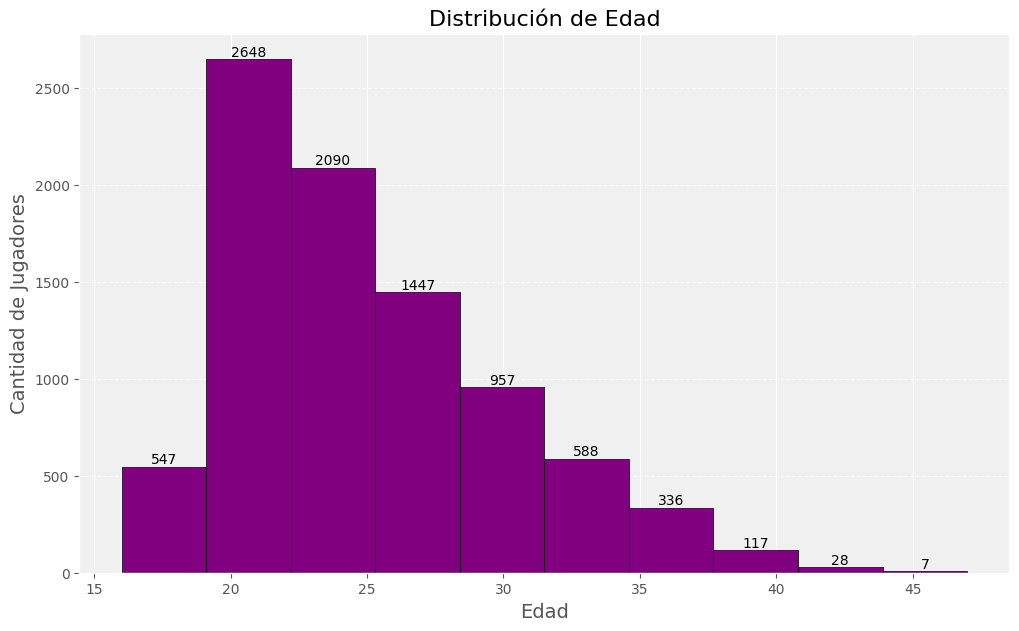

In [ ]:
#@title **code** `8. Edad`
plt.figure(figsize=(12, 7))

# Histograma con bordes negros
counts, bins, patches = plt.hist(futbol_edad_filtrado['edad'].dropna(),
                                 bins=10,
                                 color='purple',
                                 edgecolor='black')

# Títulos y etiquetas con fuentes más grandes
plt.title('Distribución de Edad', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Cantidad de Jugadores', fontsize=14)

# Conteo encima de cada barra
for count, x in zip(counts, bins[:-1]):
    plt.text(x + (bins[1] - bins[0])/2, count, int(count),
             ha='center', va='bottom', fontsize=10, color='black')

# Estilo del fondo y cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f0f0f0')  # Fondo gris claro

plt.show()


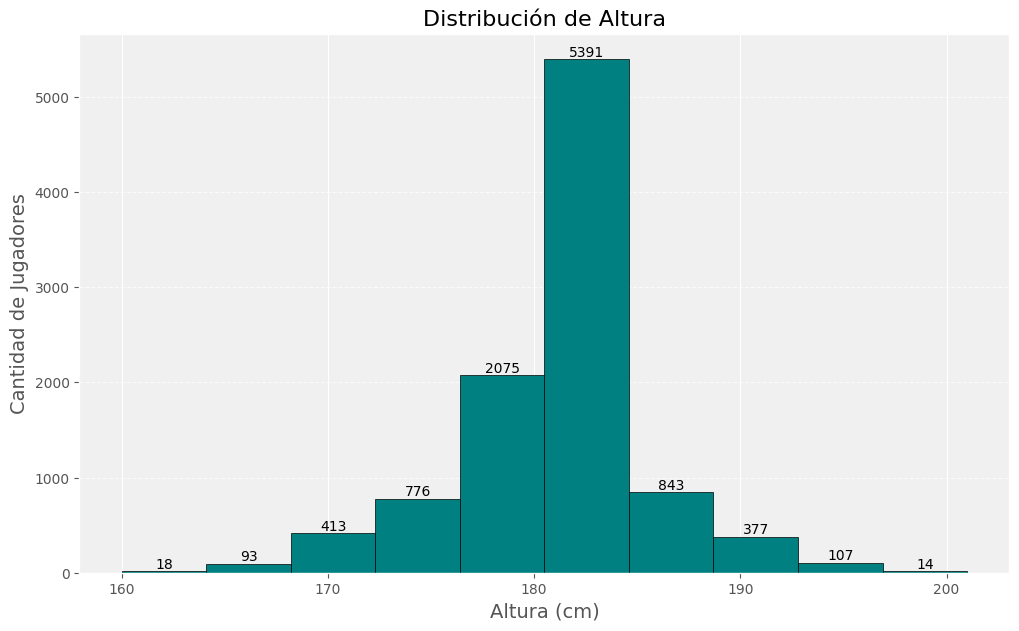

In [ ]:
#@title **code** `9. Altura`
plt.figure(figsize=(12, 7))

# Histograma con bordes negros
counts, bins, patches = plt.hist(futbol['altura'].dropna(),
                                 bins=10,
                                 color='teal',
                                 edgecolor='black')

# Títulos y etiquetas
plt.title('Distribución de Altura', fontsize=16)
plt.xlabel('Altura (cm)', fontsize=14)
plt.ylabel('Cantidad de Jugadores', fontsize=14)

# Conteo encima de cada barra
for count, x in zip(counts, bins[:-1]):
    plt.text(x + (bins[1] - bins[0])/2, count, int(count),
             ha='center', va='bottom', fontsize=10, color='black')

# Estilo de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f0f0f0')  # Fondo gris claro

plt.show()


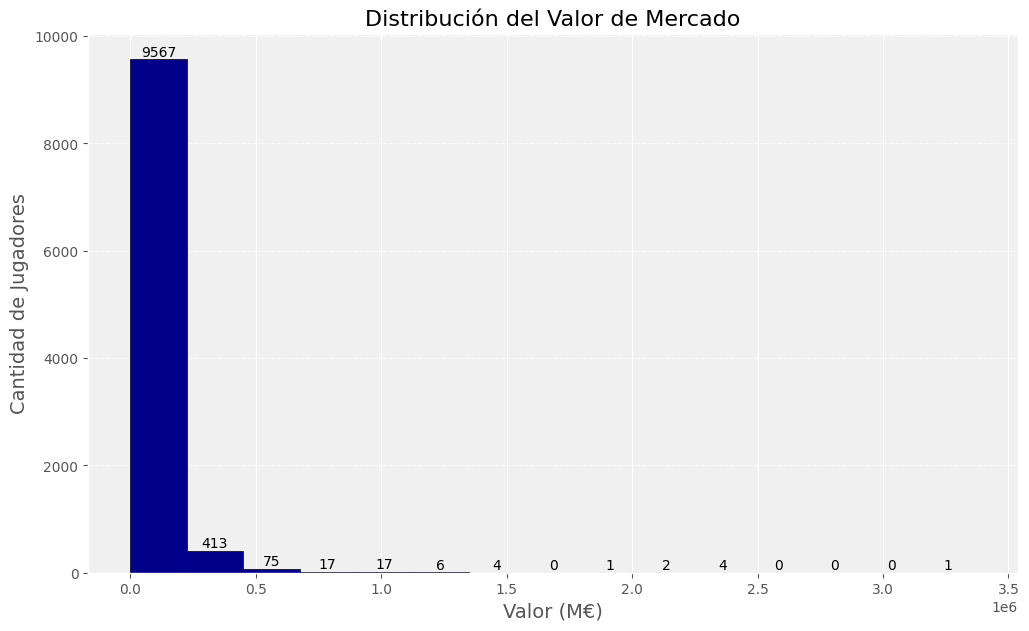

In [ ]:
#@title **code** `10. Valor`
plt.figure(figsize=(12, 7))

# Histograma con bordes negros
counts, bins, patches = plt.hist(futbol['valor'].dropna(),
                                 bins=15,
                                 color='darkblue',
                                 edgecolor='black')

# Títulos y etiquetas
plt.title('Distribución del Valor de Mercado', fontsize=16)
plt.xlabel('Valor (M€)', fontsize=14)
plt.ylabel('Cantidad de Jugadores', fontsize=14)

# Conteo encima de cada barra
for count, x in zip(counts, bins[:-1]):
    plt.text(x + (bins[1] - bins[0])/2, count, int(count),
             ha='center', va='bottom', fontsize=10, color='black')

# Estilo de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f0f0f0')  # Fondo gris claro

plt.show()


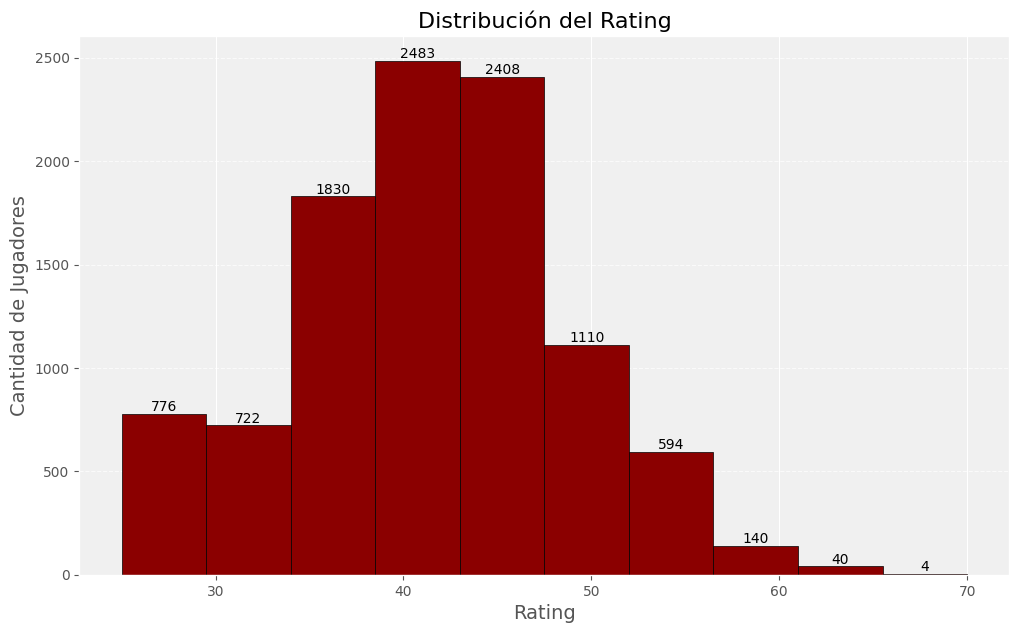

In [ ]:
#@title **code** `11. Rating`
plt.figure(figsize=(12, 7))

# Histograma con bordes negros
counts, bins, patches = plt.hist(futbol['rating'].dropna(),
                                 bins=10,
                                 color='darkred',
                                 edgecolor='black')

# Títulos y etiquetas
plt.title('Distribución del Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Cantidad de Jugadores', fontsize=14)

# Conteo encima de cada barra
for count, x in zip(counts, bins[:-1]):
    plt.text(x + (bins[1] - bins[0])/2, count, int(count),
             ha='center', va='bottom', fontsize=10, color='black')

# Estilo de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f0f0f0')  # Fondo gris claro

plt.show()


In [ ]:
pip install adjustText

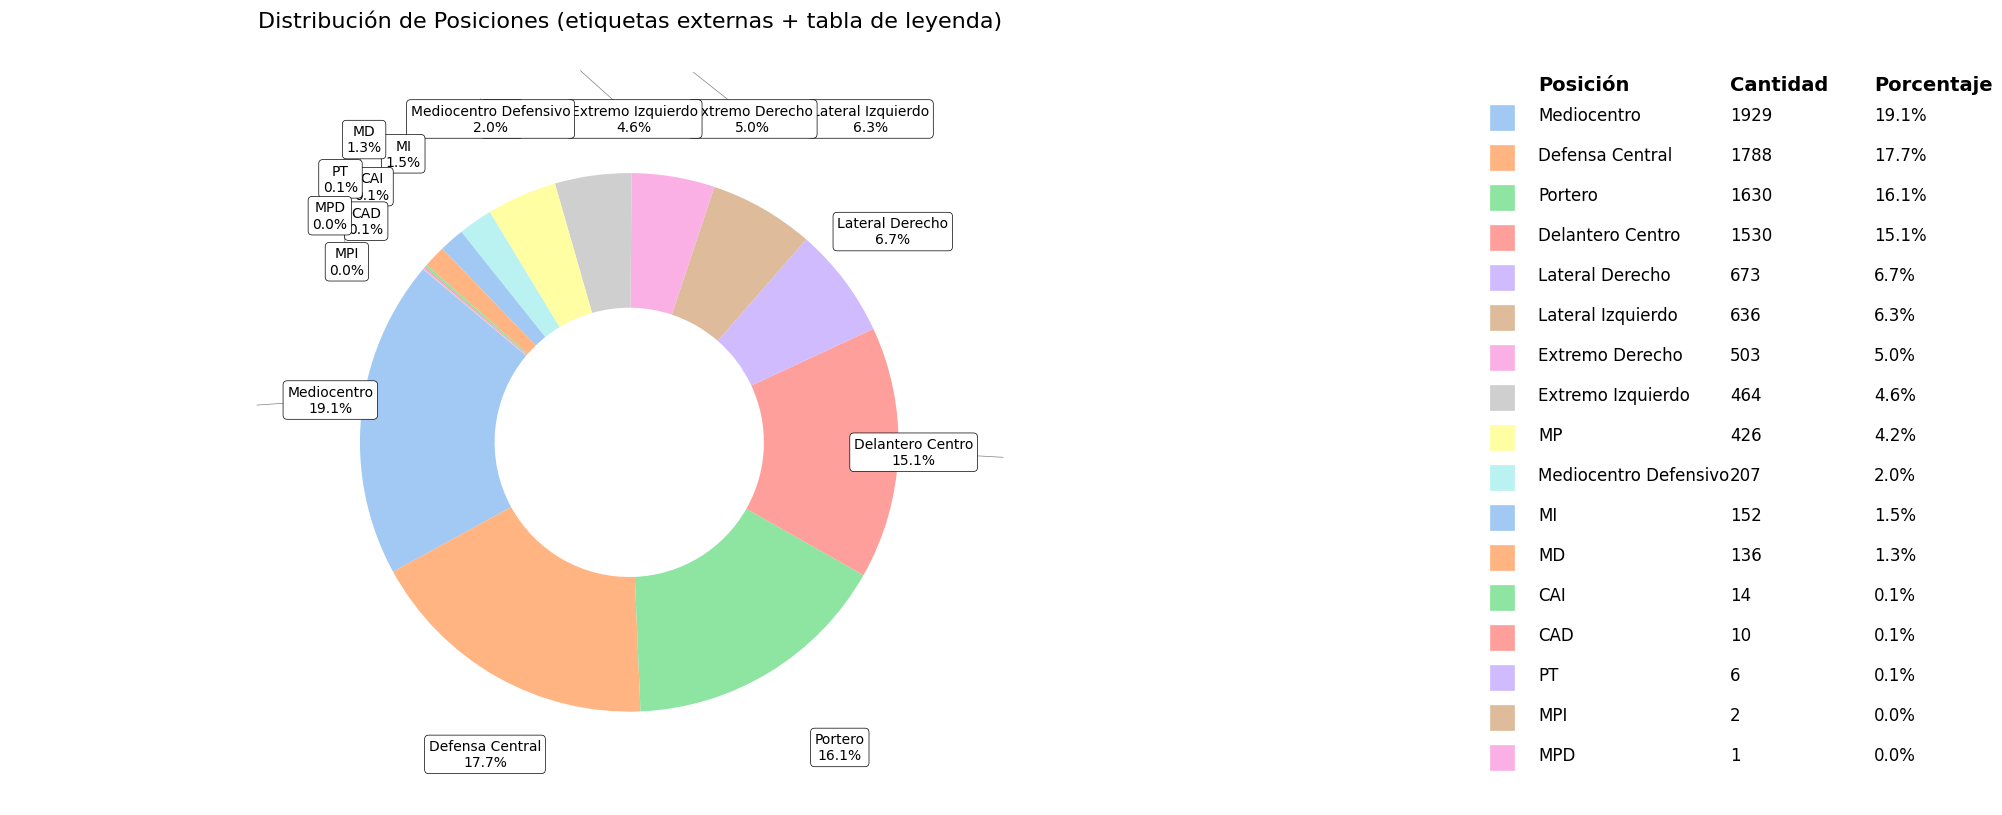

In [ ]:
#@title **code** `12. Posicion`
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Obtener valores únicos y sus cantidades
labels = futbol['posicion'].value_counts().index.tolist()
sizes = futbol['posicion'].value_counts().values.tolist()

# Asegurarse de tener suficientes colores
num_labels = len(labels)
colors = sns.color_palette('pastel', num_labels)  # Ahora sí tienes suficientes colores!

# Calcular porcentajes para incluir en la tabla
percentages = [(size / sum(sizes)) * 100 for size in sizes]

# Crear figura y eje principal
fig, ax = plt.subplots(figsize=(16, 10))

# Crear el gráfico de pastel tipo donut
wedges, _ = ax.pie(
    sizes,
    startangle=140,
    colors=colors,
    radius=1,
    wedgeprops=dict(width=0.5)
)

# Lista para los textos externos
texts = []

# Agregar etiquetas afuera de cada sección
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    x = 1.4 * np.cos(np.deg2rad(ang))  # Distancia del centro, puedes ajustar el 1.4 si hace falta
    y = 1.4 * np.sin(np.deg2rad(ang))

    label = labels[i]
    percentage_label = f'{percentages[i]:.1f}%'

    txt = ax.text(
        x, y,
        f'{label}\n{percentage_label}',
        ha='center',
        va='center',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5)
    )
    texts.append(txt)

# Ajustar textos para que no se sobrepongan
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

# Título del gráfico
ax.set_title('Distribución de Posiciones (etiquetas externas + tabla de leyenda)', fontsize=16)
ax.axis('equal')

# Crear tabla de colores, cantidades y porcentajes al costado derecho
tabla_ax = fig.add_axes([1.05, 0.3, 0.3, 0.5])  # left, bottom, width, height
tabla_ax.axis('off')

# Cabecera de la tabla
tabla_ax.text(0.1, 1.05, 'Posición', fontsize=14, fontweight='bold')
tabla_ax.text(0.5, 1.05, 'Cantidad', fontsize=14, fontweight='bold')
tabla_ax.text(0.8, 1.05, 'Porcentaje', fontsize=14, fontweight='bold')

# Mostrar la tabla con colores, cantidades y porcentajes
for i in range(num_labels):
    y_pos = 1 - (i * 0.08)

    # Cuadro del color asociado
    tabla_ax.add_patch(
        plt.Rectangle((0, y_pos - 0.03), 0.05, 0.05, color=colors[i], transform=tabla_ax.transAxes, clip_on=False)
    )

    # Nombre de la posición
    tabla_ax.text(0.1, y_pos, labels[i], fontsize=12, verticalalignment='center')

    # Cantidad de jugadores
    tabla_ax.text(0.5, y_pos, f'{sizes[i]}', fontsize=12, verticalalignment='center')

    # Porcentaje con 1 decimal
    tabla_ax.text(0.8, y_pos, f'{percentages[i]:.1f}%', fontsize=12, verticalalignment='center')

plt.show()


## **Análisis de regresión para los jugadores de la RFEF**

## **Predicción del valor del mercado de los jugadores**


In [ ]:
futbol = futbol.drop(columns=['id', 'nombre'])

MAE for max_depth 1: 48500.15916793943
Relative MAE for max_depth 1: 1.07
MAE for max_depth 2: 45109.12234659425
Relative MAE for max_depth 2: 0.99
MAE for max_depth 3: 44515.35610367874
Relative MAE for max_depth 3: 0.98
MAE for max_depth 4: 43716.73747354037
Relative MAE for max_depth 4: 0.96
MAE for max_depth 5: 44250.00035937916
Relative MAE for max_depth 5: 0.97
MAE for max_depth 6: 41258.61768905903
Relative MAE for max_depth 6: 0.91
MAE for max_depth 7: 41878.7208796056
Relative MAE for max_depth 7: 0.92
MAE for max_depth 8: 41794.45640923411
Relative MAE for max_depth 8: 0.92
MAE for max_depth 9: 41385.470943065484
Relative MAE for max_depth 9: 0.91
MAE for max_depth 10: 42895.79162914715
Relative MAE for max_depth 10: 0.94
MAE for max_depth 11: 43370.75091638737
Relative MAE for max_depth 11: 0.95
MAE for max_depth 12: 46433.529664969494
Relative MAE for max_depth 12: 1.02
MAE for max_depth 13: 47856.35253479052
Relative MAE for max_depth 13: 1.05
MAE for max_depth 14: 48206.4

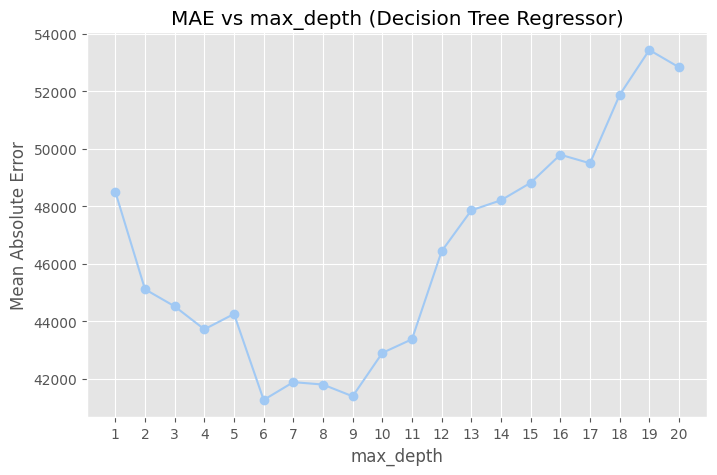

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

X = futbol[['edad','altura','partidos_jugados','asistencias','tarjeta_amarilla']]
y = futbol['valor']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=17)
depths = list(range(1, 21))

maes = []

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=17)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    maes.append(mean_absolute_error(y_test, y_pred))
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

X = futbol[['edad','altura','partidos_jugados','asistencias','tarjeta_amarilla']]
y = futbol['valor']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=17)
depths = list(range(1, 21))

maes = []
relative_MAEs = []

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=17)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    maes.append(mean_absolute_error(y_test, y_pred))
    print("MAE for max_depth {}: {}".format(d, maes[-1]))
    relative_MAE = float(maes[-1] / y_test.mean())
    relative_MAE = round(relative_MAE, 2)
    relative_MAEs.append(relative_MAE)
    print("Relative MAE for max_depth {}: {}".format(d, relative_MAE))

    if d == 1:
      bestRelativeMAE = relative_MAE
    else:
      if relative_MAE < bestRelativeMAE:
        bestRelativeMAE = relative_MAE


print("Best Relative MAE:", bestRelativeMAE)

# MAE vs Max Depth
plt.figure(figsize=(8, 5))
plt.plot(depths, maes, marker='o')
plt.title('MAE vs max_depth (Decision Tree Regressor)')
plt.xlabel('max_depth')
plt.ylabel('Mean Absolute Error')
plt.xticks(depths)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True),scoring='neg_mean_absolute_error')
        s = -s
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.grid(True)
    plt.legend()

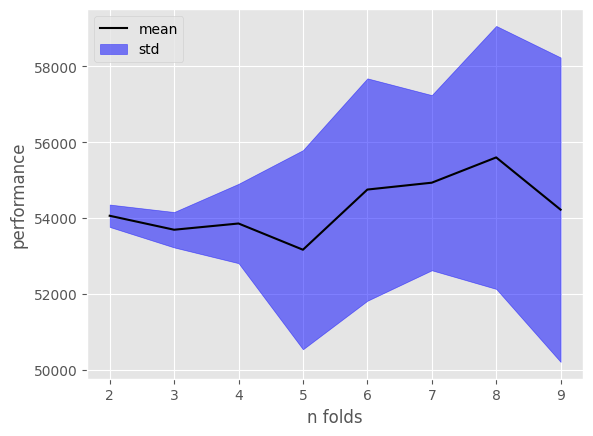

In [ ]:
show_curve(DecisionTreeRegressor())

MAE for n_estimator 10: 43392.27235989012
Relative MAE for n_estimator 10: 0.95
MAE for n_estimator 50: 42310.31821520568
Relative MAE for n_estimator 50: 0.93
MAE for n_estimator 100: 42367.49445193635
Relative MAE for n_estimator 100: 0.93
MAE for n_estimator 200: 42457.919983990345
Relative MAE for n_estimator 200: 0.93
MAE for n_estimator 300: 42666.3679737579
Relative MAE for n_estimator 300: 0.94
MAE for n_estimator 500: 42606.458878810314
Relative MAE for n_estimator 500: 0.94
Best Relative MAE: 0.93


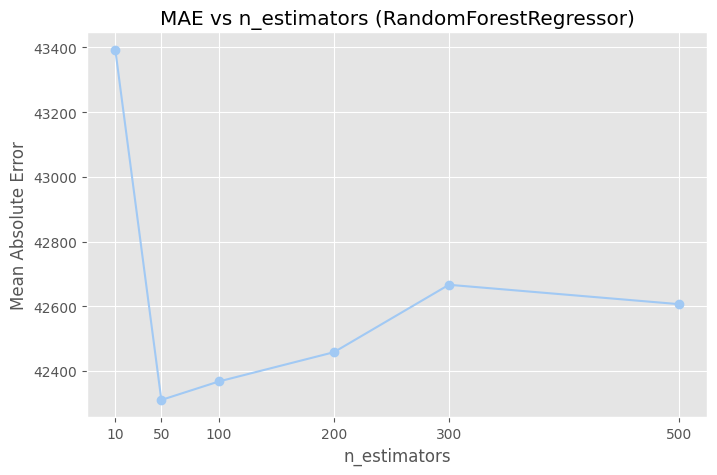

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = futbol[['edad','altura','partidos_jugados','asistencias','tarjeta_amarilla']]
y = futbol['valor']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=17)

n_estimators_list = [10, 50, 100, 200, 300, 500]
maes = []
relative_MAEs = []

for n in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n, random_state=17)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    maes.append(mean_absolute_error(y_test, y_pred))
    print("MAE for n_estimator {}: {}".format(n, maes[-1]))
    relative_MAE = float(maes[-1] / y_test.mean())
    relative_MAE = round(relative_MAE, 2)
    relative_MAEs.append(relative_MAE)
    print("Relative MAE for n_estimator {}: {}".format(n, relative_MAE))

    if n == 10:
      bestRelativeMAE = relative_MAE
    else:
      if bestRelativeMAE > relative_MAE:
        bestRelativeMAE = relative_MAE


print("Best Relative MAE:", bestRelativeMAE)


# Plot MAE vs n_estimators
plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, maes, marker='o')
plt.title('MAE vs n_estimators (RandomForestRegressor)')
plt.xlabel('n_estimators')
plt.ylabel('Mean Absolute Error')
plt.xticks(n_estimators_list)
plt.grid(True)
plt.show()

MAE for kernel linear: 41046.73673334646
Relative MAE for kernel linear: 0.9
MAE for kernel poly: 42415.34798170879
Relative MAE for kernel poly: 0.93
MAE for kernel rbf: 42441.725852636235
Relative MAE for kernel rbf: 0.93
MAE for kernel sigmoid: 42452.61727977079
Relative MAE for kernel sigmoid: 0.93
Best Relative MAE: 0.9


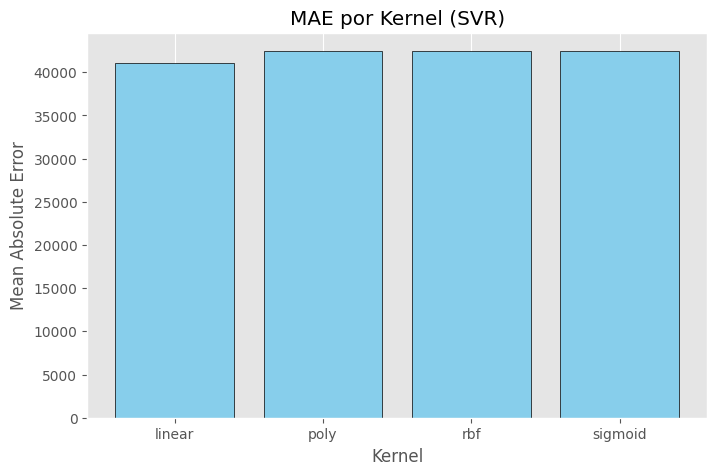

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = futbol[['edad','altura','partidos_jugados','asistencias','tarjeta_amarilla']]
y = futbol['valor']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=17)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
maes = []
relative_MAEs = []
for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    maes.append(mean_absolute_error(y_test, y_pred))
    print("MAE for kernel {}: {}".format(kernel, maes[-1]))
    relative_MAE = float(maes[-1] / y_test.mean())
    relative_MAE = round(relative_MAE, 2)
    relative_MAEs.append(relative_MAE)
    print("Relative MAE for kernel {}: {}".format(kernel, relative_MAE))

    if kernel == 'lineal':
      bestRelativeMAE = relative_MAE
    else:
      if bestRelativeMAE > relative_MAE:
        bestRelativeMAE = relative_MAE


print("Best Relative MAE:", bestRelativeMAE)

# Plot MAE vs Kernel (SVR)
plt.figure(figsize=(8,5))
plt.bar(kernels, maes, color='skyblue', edgecolor='black')
plt.title('MAE por Kernel (SVR)')
plt.xlabel('Kernel')
plt.ylabel('Mean Absolute Error')
plt.grid(axis='y')
plt.show()

# Tercera entrega


In [ ]:
# Basado en notebooks 12 y 13 - Clasificación con redes neuronales

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# ------------------------
# 1. CARGA Y PREPROCESAMIENTO (Notebook 12 & 13)
# ------------------------

# Cargar dataset
df = pd.read_csv("jugadores_RFEF_2024.csv")

# Clasificación de rating en 3 clases
def clasificar_rating(rating):
    if rating < 50:
        return 0  # Bajo
    elif rating < 60:
        return 1  # Medio
    else:
        return 2  # Alto

df['clase_rating'] = df['rating'].apply(clasificar_rating)

# Codificación de 'posicion'
le = LabelEncoder()
df['posicion'] = le.fit_transform(df['posicion'])

# Selección de características
features = ['partidos_jugados', 'partidos_titular', 'goles', 'asistencias',
            'tarjeta_amarilla', 'edad', 'altura', 'valor', 'posicion']

X = df[features]
y = df['clase_rating']

# Normalización (como notebook 12)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Codificación one-hot (como en notebook 13)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# ------------------------
# 2. FUNCIÓN PARA CREAR MODELOS (Notebook 13 adaptado)
# ------------------------

def construir_modelo(num_capas_ocultas):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

    for _ in range(num_capas_ocultas - 1):
        model.add(Dense(128, activation='relu'))

    model.add(Dense(3, activation='softmax'))  # 3 clases
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ------------------------
# 3. ENTRENAMIENTO Y EVALUACIÓN (como notebook 13)
# ------------------------

modelos = {}
historias = {}

for capas in [3, 6, 10]:
    print(f"\nEntrenando modelo con {capas} capas ocultas...\n")
    modelo = construir_modelo(capas)
    historia = modelo.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    test_loss, test_acc = modelo.evaluate(X_test, y_test_cat, verbose=0)
    print(f"Precisión en test: {test_acc:.4f}")

    modelos[capas] = modelo
    historias[capas] = historia

# ------------------------
# 4. GRAFICAR RESULTADOS (Notebook 13)
# ------------------------

for capas, historia in historias.items():
    plt.plot(historia.history['accuracy'], label=f'{capas} capas')
plt.title('Precisión en entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-3-c9d3f79dafb0>:18: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


ValueError: Unsupported file extension: ''. Supported file extensions are: .csv, .tsv, .json, .jsonl, .xml, .parquet, .feather, .sqlite, .sqlite3, .db, .db3, .s3db, .dl3, .xls, .xlsx, .xlsm, .xlsb, .odf, .ods, .odt